# linear Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
df = fetch_california_housing()

In [4]:
datasets = pd.DataFrame(df.data)

In [5]:
datasets.columns = df.feature_names

In [6]:
datasets

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
X = datasets  # Independent features
y = df.target # Dependent features

In [10]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
 X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.30, random_state=42)

In [37]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [38]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
scaler.inverse_transform(X_train)

array([[   4.1312    ,   35.        ,    5.88235294, ...,    2.98529412,
          33.93      , -118.02      ],
       [   2.8631    ,   20.        ,    4.40120968, ...,    2.0141129 ,
          32.79      , -117.09      ],
       [   4.2026    ,   24.        ,    5.61754386, ...,    2.56491228,
          34.59      , -120.14      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
          37.77      , -122.42      ]])

In [41]:
# Applying linear regression
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score

In [42]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [43]:
mse = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [44]:
np.mean(mse)

-0.5257104326777

In [45]:
# Prediction
reg_predict = regression.predict(X_test)

In [56]:
# predicted Data
reg_predict

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

C:\Users\ask50\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


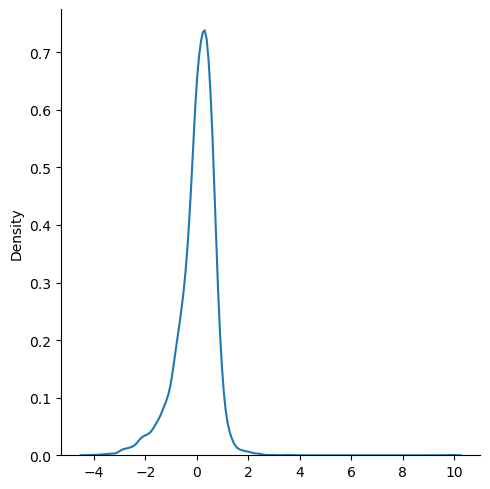

In [57]:
import seaborn as sns
sns.displot(reg_predict-y_test,kind='kde')

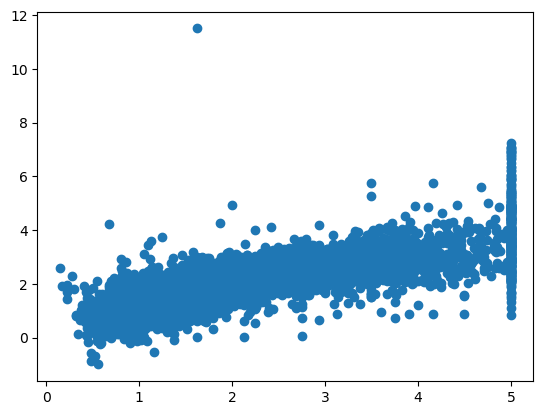

In [58]:
plt.scatter(y_test,reg_predict)

In [53]:
from sklearn.metrics import r2_score
score = r2_score(reg_predict,y_test)

In [54]:
score

0.3451339380943985